# Communal Conflict model in Ethiopia
## Ethiopia, admin2, monthly data
### 1. Random Forest Classifier 
#### 1.1. One year ahead frecast

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [101]:
#os.chdir('/home/ubuntu/darpa/models/conflict_probability')

In [102]:
#url = 'https://data.kimetrica.com/dataset/4dbc3cc7-9474-49f2-bfd4-231e78401caa/resource/7423b71d-ce8c-437c-9fe6-2d9ba58d6155/download/dataset_communal_cnflict_model.csv'
df = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_final_dataset_monthly.csv')
list(df.columns)

['Unnamed: 0',
 'group',
 'date',
 'cc_onset',
 'fatalities',
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_ci

In [103]:
df=df.drop(['fatalities'], axis=1)

In [104]:
#Training, validation and test 
start_date = "2009-12-01"
end_date = "2018-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train = df.loc[mask]

start_date = "2017-12-01"
end_date = "2019-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test = df.loc[mask]


In [105]:
test.tail()

,Unnamed: 0,group,date,cc_onset,cc_onset_1,fatalities_1,actor_state_1,actor_rebel_groups_1,actor_political_militias_1,actor_identity_militias_1,...,pop_12,maize_kg_birr_12,teff_kg_birr_12,wheat_kg_birr_12,ndvi_12,fs_crisis_12,df_emergency_12,fs_famine_12,fs_minimal_12,fs_stressed_12
20329,21213,Tigray_Western Tigray,2018-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585157.0,6.275000,16.093750,21.000833,158.149940,0.0,0.0,0.0,0.0,0.0
20352,21237,Tigray_Western Tigray,2018-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585157.0,4.206250,15.916250,20.421667,162.318806,0.0,0.0,0.0,0.0,0.0
20375,21261,Tigray_Western Tigray,2018-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585157.0,6.295793,13.385693,14.390593,154.398497,0.0,0.0,0.0,2.0,2.0
20398,21285,Tigray_Western Tigray,2018-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585157.0,6.230000,19.206364,22.080000,139.002318,0.0,0.0,0.0,0.0,0.0
20421,21309,Tigray_Western Tigray,2018-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585157.0,6.620000,16.666364,20.444286,130.248820,0.0,0.0,0.0,0.0,0.0


In [106]:
X= df[[
 'cc_onset_12',
 'fatalities_12',
 'actor_state_12',
 'actor_rebel_groups_12',
 'actor_political_militias_12',
 'actor_identity_militias_12',
 'actor_civilians_12',
 'actor_others_12',
 'inflation_all_12',
 'rainfall_12',
 'temperature_12',
 'pop_12',
 'maize_kg_birr_12',
 'teff_kg_birr_12',
 'wheat_kg_birr_12',
 'ndvi_12',
 'fs_crisis_12',
 'df_emergency_12',
 'fs_famine_12',
 'fs_minimal_12',
 'fs_stressed_12']]

In [107]:
y = df['cc_onset']

In [108]:
X_train = train[[
 'cc_onset_12',
 'fatalities_12',
 'actor_state_12',
 'actor_rebel_groups_12',
 'actor_political_militias_12',
 'actor_identity_militias_12',
 'actor_civilians_12',
 'actor_others_12',
 'inflation_all_12',
 'rainfall_12',
 'temperature_12',
 'pop_12',
 'maize_kg_birr_12',
 'teff_kg_birr_12',
 'wheat_kg_birr_12',
 'ndvi_12',
 'fs_crisis_12',
 'df_emergency_12',
 'fs_famine_12',
 'fs_minimal_12',
 'fs_stressed_12'
  ]]

In [109]:
y_train = train[['cc_onset']]
#y_train = pd.Series(y_train['cc_onset'].values, index = y_train['cc_onset'])

In [110]:
X_test = test[[
 'cc_onset_12',
 'fatalities_12',
 'actor_state_12',
 'actor_rebel_groups_12',
 'actor_political_militias_12',
 'actor_identity_militias_12',
 'actor_civilians_12',
 'actor_others_12',
 'inflation_all_12',
 'rainfall_12',
 'temperature_12',
 'pop_12',
 'maize_kg_birr_12',
 'teff_kg_birr_12',
 'wheat_kg_birr_12',
 'ndvi_12',
 'fs_crisis_12',
 'df_emergency_12',
 'fs_famine_12',
 'fs_minimal_12',
 'fs_stressed_12']]

In [111]:
y_test = test[['cc_onset']]
y_test = pd.Series(y_test['cc_onset'].values, index = y_test['cc_onset'])
y_train=pd.Series(y_train['cc_onset'].values, index = y_train['cc_onset'])

# Visualize the data distribution

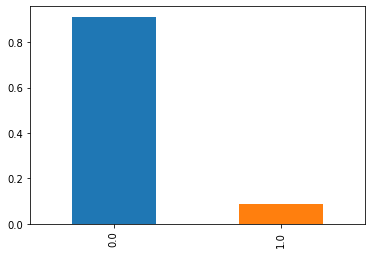

In [112]:
break_down = y_test.value_counts(normalize=True)
break_down.plot(kind='bar')
plt.show()
#ax = train['conflict_onset'].plot.bar(rot=0)

# Train RF with gridsearch

In [113]:
rf_model =RandomForestClassifier(class_weight='balanced')

params={
      'bootstrap': [True],
 'max_depth': [8,10,12],
  'min_samples_split':[2,6,8],
  'min_samples_leaf': [2,4,6],
   }

In [114]:
rf_grid = GridSearchCV(rf_model, params, cv=5)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [115]:
rf_test_prediction=rf_grid.predict(X_test)

In [116]:
confusion_matrix(y_test, rf_test_prediction)

array([[773,  36],
       [ 78,   1]])

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_test_prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       809
         1.0       0.03      0.01      0.02        79

    accuracy                           0.87       888
   macro avg       0.47      0.48      0.47       888
weighted avg       0.83      0.87      0.85       888



### 1.1. 6 month ahead frecast

In [118]:
#Training, validation and test 
start_date = "2009-12-01"
end_date = "2018-07-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train = df.loc[mask]

start_date = "2018-06-01"
end_date = "2019-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test = df.loc[mask]


In [119]:
X_train = train[[
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',]]
y_train = train[['cc_onset']]

X_test = test[[
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',]]

y_test = test[['cc_onset']]
y_test = pd.Series(y_test['cc_onset'].values, index = y_test['cc_onset'])
y_train=pd.Series(y_train['cc_onset'].values, index = y_train['cc_onset'])

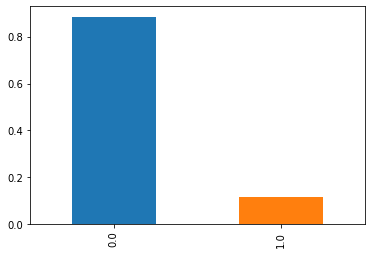

In [120]:
break_down = y_test.value_counts(normalize=True)
break_down.plot(kind='bar')
plt.show()

In [121]:
rf_model =RandomForestClassifier(class_weight='balanced')

params={
      'bootstrap': [True],
 'max_depth': [8,10,12],
  'min_samples_split':[2,6,8],
  'min_samples_leaf': [2,4,6],
   }

In [122]:
rf_grid = GridSearchCV(rf_model, params, cv=5)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [123]:
rf_test_prediction=rf_grid.predict(X_test)

In [124]:
confusion_matrix(y_test, rf_test_prediction)

array([[392,   1],
       [ 49,   2]])

In [125]:
print(classification_report(y_test, rf_test_prediction))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       393
         1.0       0.67      0.04      0.07        51

    accuracy                           0.89       444
   macro avg       0.78      0.52      0.51       444
weighted avg       0.86      0.89      0.84       444



### 1.1. 3 month ahead frecast

In [126]:
#Training, validation and test 
start_date = "2009-12-01"
end_date = "2018-10-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train = df.loc[mask]

start_date = "2018-09-01"
end_date = "2019-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test = df.loc[mask]

In [127]:
X_train = train[[
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',
 'cc_onset_7',
 'fatalities_7',
 'actor_state_7',
 'actor_rebel_groups_7',
 'actor_political_militias_7',
 'actor_identity_militias_7',
 'actor_civilians_7',
 'actor_others_7',
 'inflation_all_7',
 'rainfall_7',
 'temperature_7',
 'pop_7',
 'maize_kg_birr_7',
 'teff_kg_birr_7',
 'wheat_kg_birr_7',
 'ndvi_7',
 'fs_crisis_7',
 'df_emergency_7',
 'fs_famine_7',
 'fs_minimal_7',
 'fs_stressed_7',
 'cc_onset_8',
 'fatalities_8',
 'actor_state_8',
 'actor_rebel_groups_8',
 'actor_political_militias_8',
 'actor_identity_militias_8',
 'actor_civilians_8',
 'actor_others_8',
 'inflation_all_8',
 'rainfall_8',
 'temperature_8',
 'pop_8',
 'maize_kg_birr_8',
 'teff_kg_birr_8',
 'wheat_kg_birr_8',
 'ndvi_8',
 'fs_crisis_8',
 'df_emergency_8',
 'fs_famine_8',
 'fs_minimal_8',
 'fs_stressed_8',
 'cc_onset_9',
 'fatalities_9',
 'actor_state_9',
 'actor_rebel_groups_9',
 'actor_political_militias_9',
 'actor_identity_militias_9',
 'actor_civilians_9',
 'actor_others_9',
 'inflation_all_9',
 'rainfall_9',
 'temperature_9',
 'pop_9',
 'maize_kg_birr_9',
 'teff_kg_birr_9',
 'wheat_kg_birr_9',
 'ndvi_9',
 'fs_crisis_9',
 'df_emergency_9',
 'fs_famine_9',
 'fs_minimal_9',
 'fs_stressed_9',]]

X_test = test[[
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_civilians_3',
 'actor_others_3',
 'inflation_all_3',
 'rainfall_3',
 'temperature_3',
 'pop_3',
 'maize_kg_birr_3',
 'teff_kg_birr_3',
 'wheat_kg_birr_3',
 'ndvi_3',
 'fs_crisis_3',
 'df_emergency_3',
 'fs_famine_3',
 'fs_minimal_3',
 'fs_stressed_3',
 'cc_onset_4',
 'fatalities_4',
 'actor_state_4',
 'actor_rebel_groups_4',
 'actor_political_militias_4',
 'actor_identity_militias_4',
 'actor_civilians_4',
 'actor_others_4',
 'inflation_all_4',
 'rainfall_4',
 'temperature_4',
 'pop_4',
 'maize_kg_birr_4',
 'teff_kg_birr_4',
 'wheat_kg_birr_4',
 'ndvi_4',
 'fs_crisis_4',
 'df_emergency_4',
 'fs_famine_4',
 'fs_minimal_4',
 'fs_stressed_4',
 'cc_onset_5',
 'fatalities_5',
 'actor_state_5',
 'actor_rebel_groups_5',
 'actor_political_militias_5',
 'actor_identity_militias_5',
 'actor_civilians_5',
 'actor_others_5',
 'inflation_all_5',
 'rainfall_5',
 'temperature_5',
 'pop_5',
 'maize_kg_birr_5',
 'teff_kg_birr_5',
 'wheat_kg_birr_5',
 'ndvi_5',
 'fs_crisis_5',
 'df_emergency_5',
 'fs_famine_5',
 'fs_minimal_5',
 'fs_stressed_5',
 'cc_onset_6',
 'fatalities_6',
 'actor_state_6',
 'actor_rebel_groups_6',
 'actor_political_militias_6',
 'actor_identity_militias_6',
 'actor_civilians_6',
 'actor_others_6',
 'inflation_all_6',
 'rainfall_6',
 'temperature_6',
 'pop_6',
 'maize_kg_birr_6',
 'teff_kg_birr_6',
 'wheat_kg_birr_6',
 'ndvi_6',
 'fs_crisis_6',
 'df_emergency_6',
 'fs_famine_6',
 'fs_minimal_6',
 'fs_stressed_6',
 'cc_onset_7',
 'fatalities_7',
 'actor_state_7',
 'actor_rebel_groups_7',
 'actor_political_militias_7',
 'actor_identity_militias_7',
 'actor_civilians_7',
 'actor_others_7',
 'inflation_all_7',
 'rainfall_7',
 'temperature_7',
 'pop_7',
 'maize_kg_birr_7',
 'teff_kg_birr_7',
 'wheat_kg_birr_7',
 'ndvi_7',
 'fs_crisis_7',
 'df_emergency_7',
 'fs_famine_7',
 'fs_minimal_7',
 'fs_stressed_7',
 'cc_onset_8',
 'fatalities_8',
 'actor_state_8',
 'actor_rebel_groups_8',
 'actor_political_militias_8',
 'actor_identity_militias_8',
 'actor_civilians_8',
 'actor_others_8',
 'inflation_all_8',
 'rainfall_8',
 'temperature_8',
 'pop_8',
 'maize_kg_birr_8',
 'teff_kg_birr_8',
 'wheat_kg_birr_8',
 'ndvi_8',
 'fs_crisis_8',
 'df_emergency_8',
 'fs_famine_8',
 'fs_minimal_8',
 'fs_stressed_8',
 'cc_onset_9',
 'fatalities_9',
 'actor_state_9',
 'actor_rebel_groups_9',
 'actor_political_militias_9',
 'actor_identity_militias_9',
 'actor_civilians_9',
 'actor_others_9',
 'inflation_all_9',
 'rainfall_9',
 'temperature_9',
 'pop_9',
 'maize_kg_birr_9',
 'teff_kg_birr_9',
 'wheat_kg_birr_9',
 'ndvi_9',
 'fs_crisis_9',
 'df_emergency_9',
 'fs_famine_9',
 'fs_minimal_9',
 'fs_stressed_9',]]
y_test = test[['cc_onset']]
y_train = train[['cc_onset']]
y_test = pd.Series(y_test['cc_onset'].values, index = y_test['cc_onset'])
y_train=pd.Series(y_train['cc_onset'].values, index = y_train['cc_onset'])

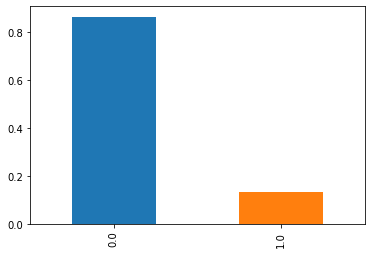

In [128]:
break_down = y_test.value_counts(normalize=True)
break_down.plot(kind='bar')
plt.show()

In [129]:
rf_model =RandomForestClassifier(class_weight='balanced')

params={
      'bootstrap': [True],
 'max_depth': [8,10,12],
  'min_samples_split':[2,6,8],
  'min_samples_leaf': [2,4,6],
   }

rf_grid = GridSearchCV(rf_model, params, cv=5)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [130]:
rf_test_prediction=rf_grid.predict(X_test)

In [131]:
confusion_matrix(y_test, rf_test_prediction)

array([[192,   0],
       [ 30,   0]])

In [132]:
print(classification_report(y_test, rf_test_prediction))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       192
         1.0       0.00      0.00      0.00        30

    accuracy                           0.86       222
   macro avg       0.43      0.50      0.46       222
weighted avg       0.75      0.86      0.80       222



/Users/yaredhurisa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
